# Predicting Student Dropout Rates: An Examination of Student Characteristics and Economic Indicators

This project aims to predict student dropout and academic success based on various student characteristics and academic indicators.

### Data: 

The dataset used in this project comes from Kaggle, https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?select=dataset.csv, detailing various aspects of a student's personal background, academic performance, economic indicators, and more. To be more specific, the dataset includes variables such as marital status, nationality, parents' qualifications and occupations, debtor status, age at enrollment, curricular units performance, among others. Additionally, it includes some economic indicators such as unemployment rate, inflation rate, and GDP, which provides a broader context to the student's situation.

### Motivation: 

As a first-generation international student, I am deeply intrigued by how these diverse backgrounds may shape the academic outcomes of students in a broad sense. In addition to discerning any potential correlations between these student characteristics and dropout rates, I am also keen on creating a predictive model for students' academic success.

### Research Questions: 

The main question this project seeks to address is: 
- "Can we predict whether a student will drop out or graduate based on their characteristics?"

#### Subsidiary questions include: 

- "Does a correlation exist between the likelihood of dropping out and certain academic attributes"


In [1]:
# install packages
!pip install kaggle
!pip install pandas
!pip install matplotlib

# set the api env
import os
# Specify credentials
os.environ['KAGGLE_USERNAME'] = "constantinewang" # replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "965a8311015c3039e89e307e4cae5ee6" # replace with your Kaggle key



## Import data and summary statistics

In [2]:
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi



# Initialize the API
api = KaggleApi()
api.authenticate()

#download dataset
api.dataset_download_files('naveenkumar20bps1137/predict-students-dropout-and-academic-success')

#unzip the downloaded dataset
with zipfile.ZipFile('predict-students-dropout-and-academic-success.zip', 'r') as zip_ref:
    zip_ref.extractall()

#load dataset into a pandas DataFrame
df = pd.read_csv('dataset.csv')


#dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Exploratory visualizations

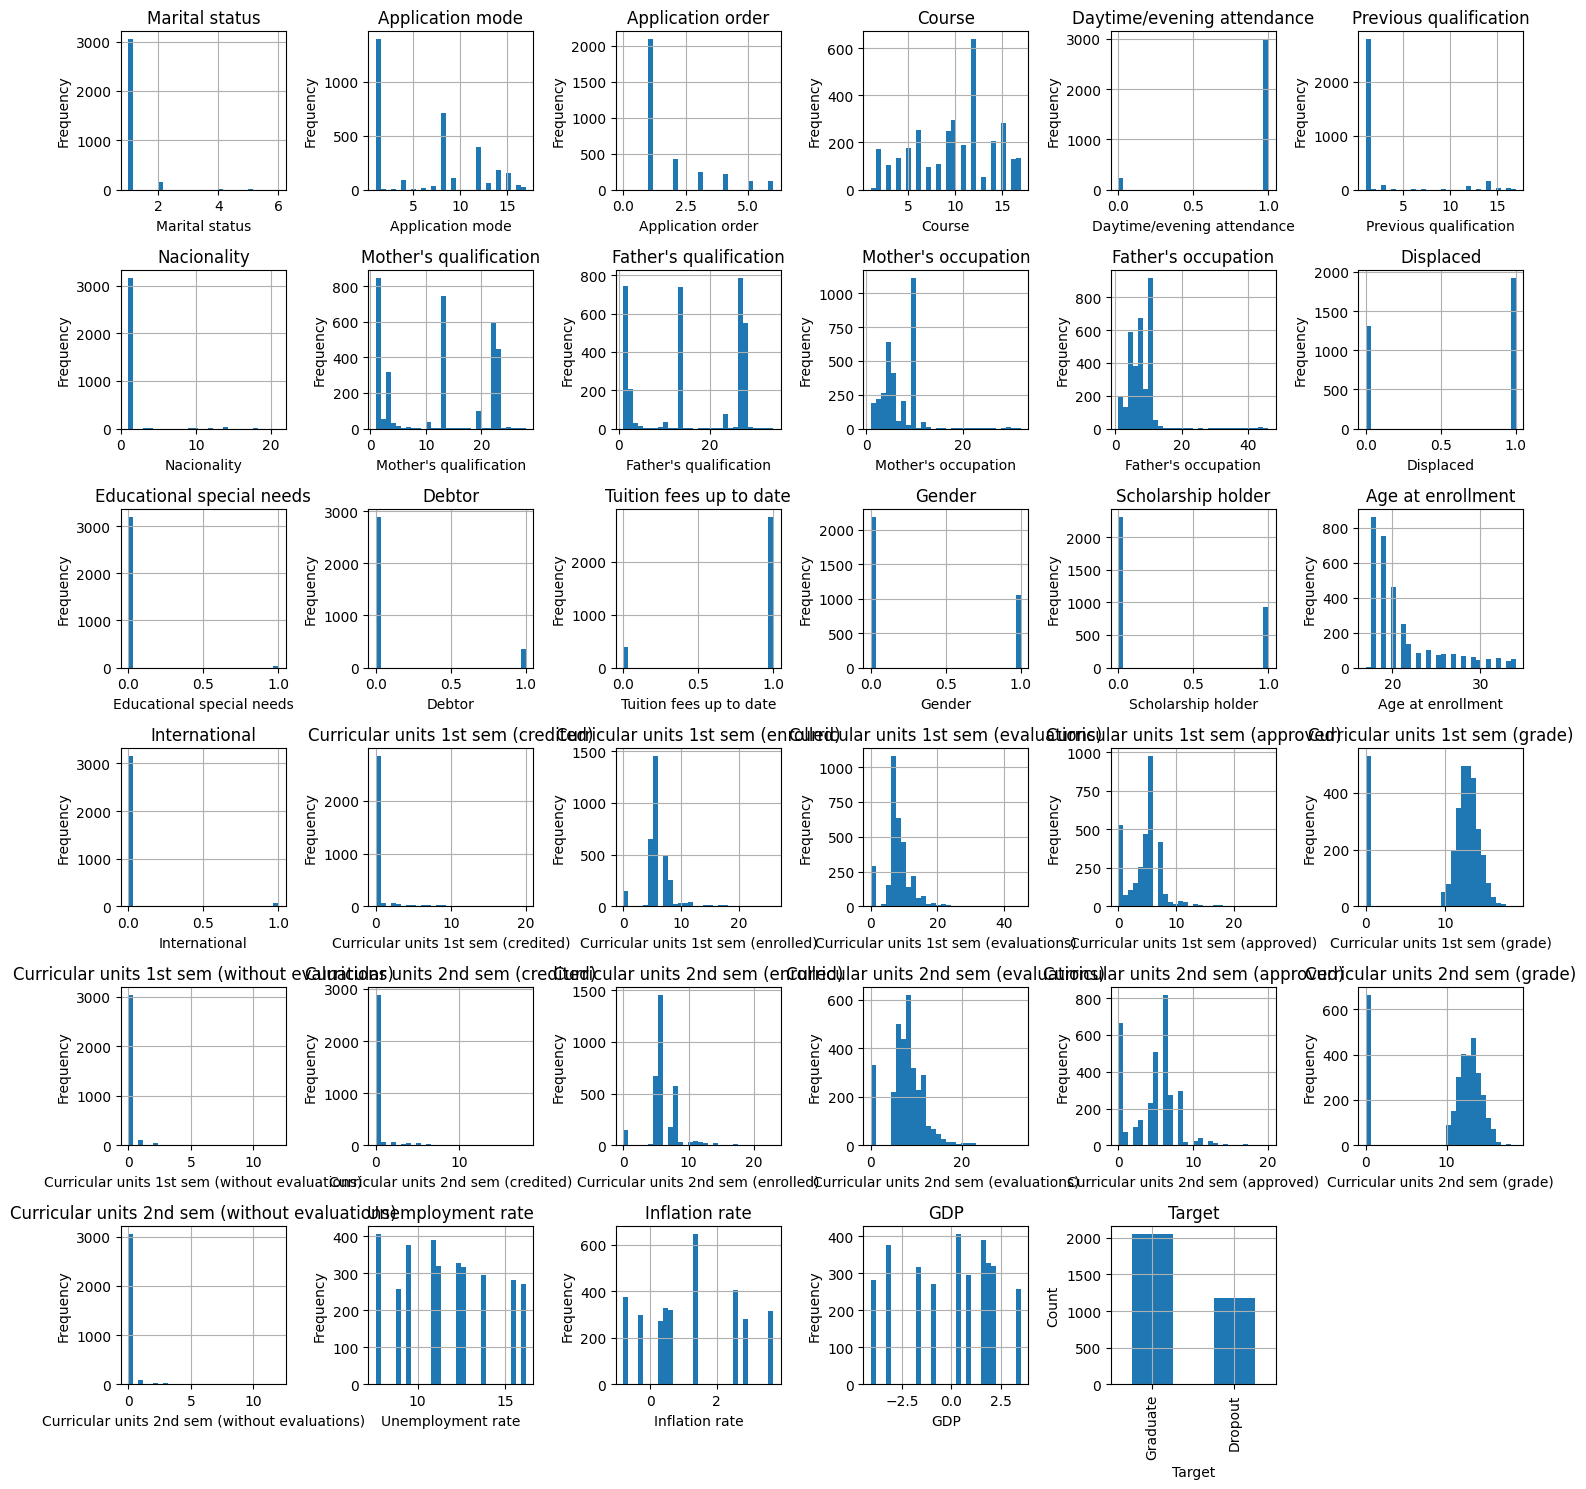

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#total numbers
num_of_cols = df.shape[1]

#make alignment&size
subplot_rows = int(np.ceil(np.sqrt(num_of_cols)))
subplot_cols = int(np.ceil(num_of_cols / subplot_rows))
plt.figure(figsize=(15, 15))

for idx, column in enumerate(df.columns, start=1):
    plt.subplot(subplot_rows, subplot_cols, idx)
    
    #for columns that are numeric type, we create histogram
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].hist(bins=30)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        
    #for columns that are categorical type, we create bar plot
    else:
        df[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.grid(True)

plt.tight_layout()
plt.show()


## Clean the data before doing visualization

The dataset has already cut off null value and encode categorical columns.

In [10]:
#check if there are null/missing values
is_null = df.isnull().sum()

print(is_null)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [4]:
# We do not need the record that is currently enrolled
df = df[df['Target'] != 'Enrolled']
print(df['Target'].unique())

# cut off outliers that have a unusual age
numerical_cols = ['Age at enrollment',]
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #only keep rows in the dataframe that do not contain outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

#check the new min max
print("Min Age: ", df['Age at enrollment'].min())
print("Max Age: ", df['Age at enrollment'].max())

['Dropout' 'Graduate']
Min Age:  17
Max Age:  34


### Visualization 1: The relation between enrollment age and student status

Upon examining the visualizations, it becomes clear that the probability of successful graduation is notably higher for students who enroll at a younger age,  This trend of increased successful graduations with lower enrollment age is particularly pronounced up to the age of 26. After age of 26 it becomes less distinct.

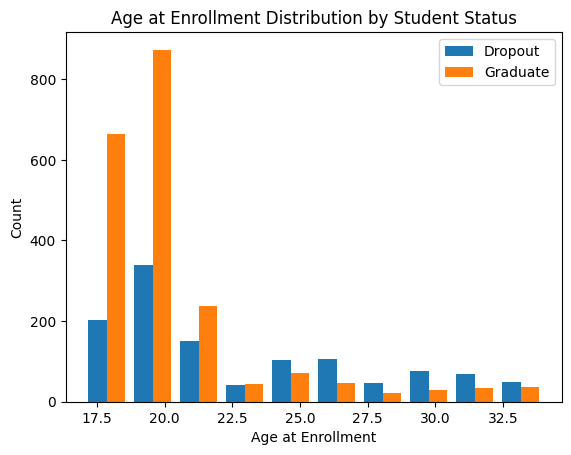

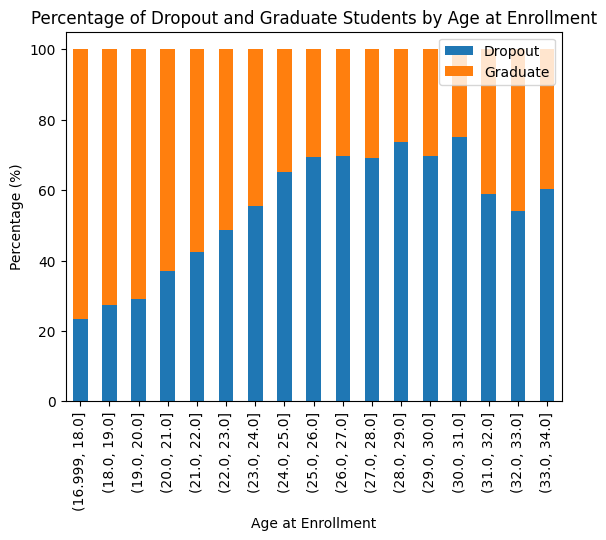

In [5]:
import matplotlib.pyplot as plt

#Histogram of Age at enrollment with Student Status
dropout_age = df[df['Target'] == 'Dropout']['Age at enrollment']
graduate_age = df[df['Target'] == 'Graduate']['Age at enrollment']
plt.hist([dropout_age, graduate_age], label=['Dropout', 'Graduate'])
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.title('Age at Enrollment Distribution by Student Status')
plt.legend()
plt.show()


#create bins for ages
bins = range(df['Age at enrollment'].min(), df['Age at enrollment'].max()+1)
# create a DataFrame for dropouts
dropout_df = df[df['Target'] == 'Dropout']['Age at enrollment'].value_counts(bins=bins, sort=False).rename('Dropout')
dropout_df /= df['Age at enrollment'].value_counts(bins=bins, sort=False)
dropout_df *= 100
# percentage

#create a DataFrame for graduates
graduate_df = df[df['Target'] == 'Graduate']['Age at enrollment'].value_counts(bins=bins, sort=False).rename('Graduate')
graduate_df /= df['Age at enrollment'].value_counts(bins=bins, sort=False)
graduate_df *= 100

# combine them into a single DataFrame
percentage_df = pd.concat([dropout_df, graduate_df], axis=1)

#create a bar plot
percentage_df.plot(kind='bar', stacked=True)
plt.xlabel('Age at Enrollment')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Dropout and Graduate Students by Age at Enrollment')
plt.legend()
plt.show()





### Visualization 2: The relation between first semester grade and student status

Upon examining the box plot, it becomes clear that the probability of successful graduation is notably higher for students who have a better grade at first semester. 

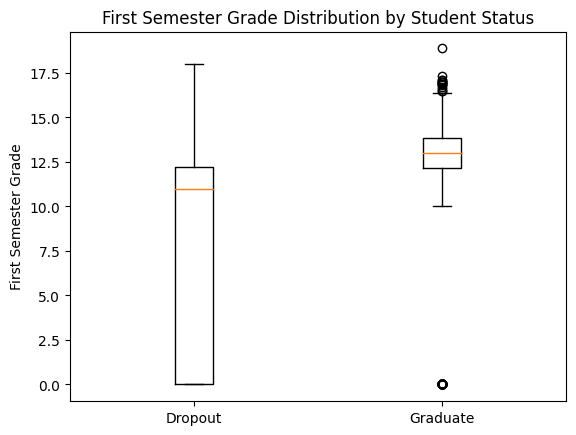

In [6]:
#Boxplot of 'Curricular units 1st sem (grade)' divided by Student Status
dropout_grade = df[df['Target']=='Dropout']['Curricular units 1st sem (grade)']
graduate_grade = df[df['Target']=='Graduate']['Curricular units 1st sem (grade)']
plt.boxplot([dropout_grade, graduate_grade], labels=['Dropout', 'Graduate'])
plt.title('First Semester Grade Distribution by Student Status')
plt.ylabel('First Semester Grade')
plt.show()

### Visualization 3: The relation between Daytime/Evening Attendance and student status

Upon examining the box plot, it becomes clear that the probability of successful graduation is notably higher for students who attend classes at daytime.

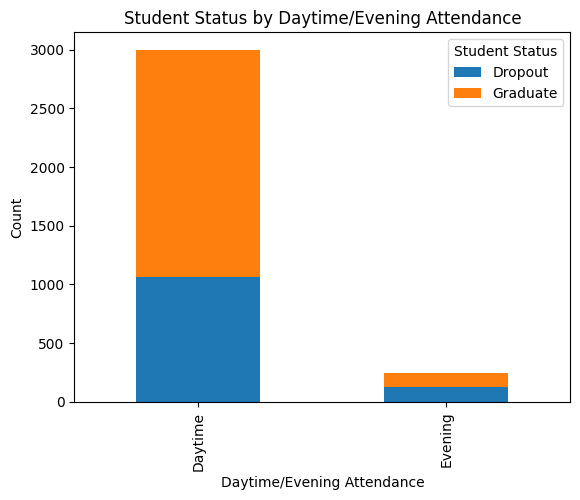

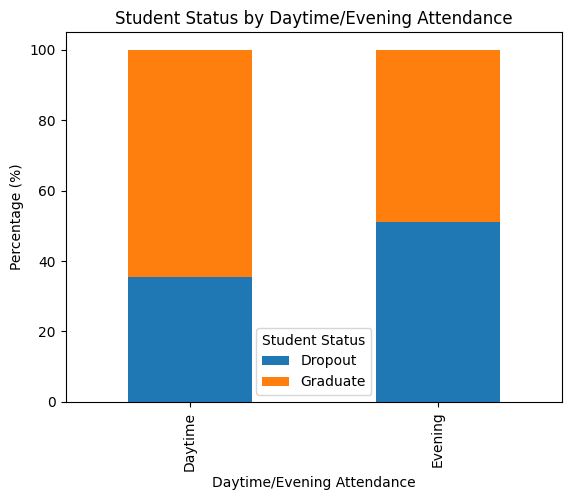

In [7]:
#create a mapping dictionary
mapping = {0: 'Evening', 1: 'Daytime'}
#make a copy of the dataframe to not change the original one
df_copy = df.copy()
df_copy['Daytime/evening attendance'] = df_copy['Daytime/evening attendance'].map(mapping)

#create a grouped dataframe
grouped_df = df_copy.groupby(['Daytime/evening attendance', 'Target']).size().unstack()

#create a bar plot
grouped_df.plot(kind='bar', stacked=True)

plt.title('Student Status by Daytime/Evening Attendance')
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Count')
plt.legend(title='Student Status')
plt.show()


#get percentages
grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

#create a bar plot
grouped_df.plot(kind='bar', stacked=True)
plt.title('Student Status by Daytime/Evening Attendance')
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Percentage (%)')
plt.legend(title='Student Status')
plt.show()


### Visualization 4: The relation between marital status and student status

Upon analyzing the first chart, it's evident that students with a single status demonstrate the highest rate of successful graduation. However, the second chart, which presents the overall distribution of marital statuses of population, reveals a substantial imbalance in the dataset, with single students comprising the majority. As such, the previously drawn conclusion that single students are most likely to graduate may be influenced by this imbalance.

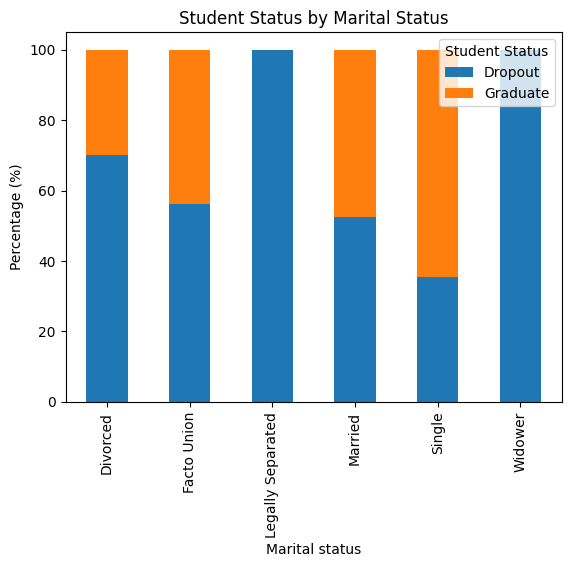

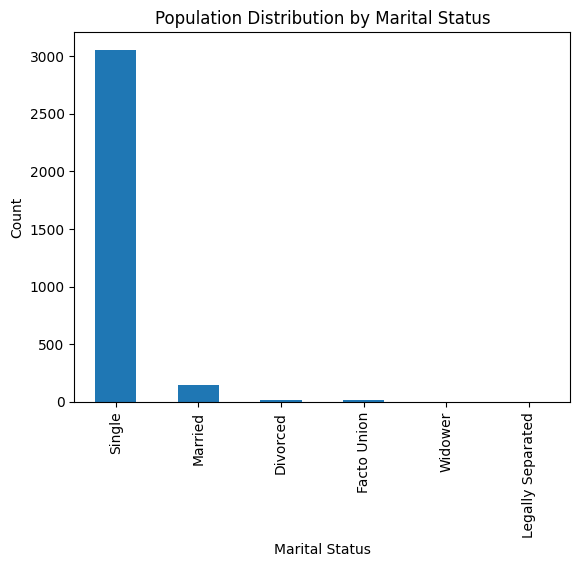

In [8]:
#map the marital status
def map_marital_status(status):
    if status == 1:
        return 'Single'
    elif status == 2:
        return 'Married'
    elif status == 3:
        return 'Widower'
    elif status == 4:
        return 'Divorced'
    elif status == 5:
        return 'Facto Union'
    elif status == 6:
        return 'Legally Separated'
    else:
        return 'Other'

#function to the Marital Status column
df_copy['Marital status'] = df_copy['Marital status'].apply(map_marital_status)

#create a grouped dataframe
grouped_df_marital = df_copy.groupby(['Marital status', 'Target']).size().unstack()




#normalize to get percentages and multiply by 100
grouped_df_marital = grouped_df_marital.div(grouped_df_marital.sum(axis=1), axis=0)*100



#create a bar plot
grouped_df_marital.plot(kind='bar', stacked=True)
plt.title('Student Status by Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Percentage (%)')
plt.legend(title='Student Status')
plt.show()

#first let's visualize the number of people of each marital status
df_copy['Marital status'].value_counts().plot(kind='bar')
plt.title('Population Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

